In [1]:
import pathlib
import tensorflow as tf
data_dir = pathlib.Path('dataset')
val_dir = pathlib.Path('dataval')

batch_size = 3
image_height = 101
image_width = 101

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 240 files belonging to 3 classes.
Using 192 files for training.
Found 60 files belonging to 3 classes.
Using 48 files for training.


In [2]:
#import matplotlib.pyplot as plt
from tensorflow.keras import layers

class_names = val_data.class_names
num_classes = 3

# CREATE CNN
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# COMPILE CNN
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [3]:
# Tensorboard
import keras
logdir = "logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, write_images=logdir, embeddings_metadata=train_data)

In [4]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=17,
    callbacks=[tensorboard_callback]
)

Epoch 1/17
64/64 [==============================] - 126s 2s/step - loss: 1.1282 - accuracy: 0.3451 - val_loss: 1.0957 - val_accuracy: 0.3333
Epoch 2/17
64/64 [==============================] - 111s 2s/step - loss: 1.0968 - accuracy: 0.3983 - val_loss: 1.0563 - val_accuracy: 0.6458
Epoch 3/17
64/64 [==============================] - 110s 2s/step - loss: 1.0489 - accuracy: 0.5172 - val_loss: 0.9434 - val_accuracy: 0.6250
Epoch 4/17
64/64 [==============================] - 107s 2s/step - loss: 0.9855 - accuracy: 0.5093 - val_loss: 1.0017 - val_accuracy: 0.5000
Epoch 5/17
64/64 [==============================] - 115s 2s/step - loss: 0.9216 - accuracy: 0.5393 - val_loss: 0.9404 - val_accuracy: 0.6458
Epoch 6/17
64/64 [==============================] - 117s 2s/step - loss: 0.8247 - accuracy: 0.5988 - val_loss: 0.9532 - val_accuracy: 0.4375
Epoch 7/17
64/64 [==============================] - 122s 2s/step - loss: 0.7766 - accuracy: 0.5950 - val_loss: 1.0041 - val_accuracy: 0.4583
Epoch 8/17
64

In [5]:
# VOIR L'INTGRALITE DU CNN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 101, 101, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 128)       6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0

[[0.5927817  0.4062198  0.00099848]]


'cat'

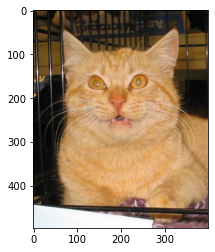

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image_to_predict = cv2.imread('./testset/cats_00164.jpg')
plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
image_to_predict = np.expand_dims(cv2.resize(image_to_predict, (101, 101)), axis=0)
#res = model.predict_classes(image_to_predict)
print(model.predict(image_to_predict))
#model.predict(image_to_predict)
class_names[np.argmax(model.predict(image_to_predict), axis=-1)[0]]

[[2.5500351e-04 9.9903786e-01 7.0712890e-04]]


'dog'

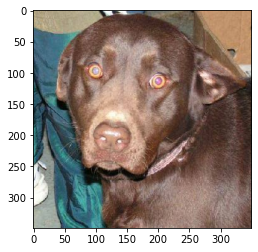

In [9]:
image_to_predict2 = cv2.imread('./testset/dogs_00200.jpg')
plt.imshow(cv2.cvtColor(image_to_predict2, cv2.COLOR_BGR2RGB))
image_to_predict2 = np.expand_dims(cv2.resize(image_to_predict2, (101, 101)), axis=0)
#res = model.predict_classes(image_to_predict)
print(model.predict(image_to_predict2))
#model.predict(image_to_predict)
class_names[np.argmax(model.predict(image_to_predict2), axis=-1)[0]]

[[2.0136154e-08 3.3512104e-05 9.9996650e-01]]


'panda'

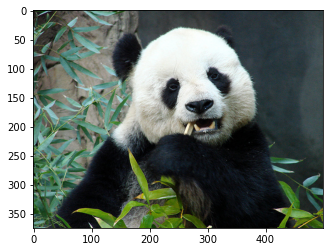

In [10]:
image_to_predict3 = cv2.imread('./testset/panda_00101.jpg')
plt.imshow(cv2.cvtColor(image_to_predict3, cv2.COLOR_BGR2RGB))
image_to_predict3 = np.expand_dims(cv2.resize(image_to_predict3, (101, 101)), axis=0)
#res = model.predict_classes(image_to_predict)
print(model.predict(image_to_predict3))
#model.predict(image_to_predict)
class_names[np.argmax(model.predict(image_to_predict3), axis=-1)[0]]